In [2]:
import os
from glob import glob

import numpy as np

import tensorflow as tf
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
os.listdir('dataset/mnist_png/training/')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
os.getcwd()

'D:\\Work\\Part3'

In [56]:
data_paths = glob('dataset/mnist_png/training/*/*.png')

In [57]:
data_paths[-1]

'dataset/mnist_png/training\\9\\9998.png'

In [58]:
path = data_paths[0]

In [59]:
path

'dataset/mnist_png/training\\0\\1.png'

# 데이터 분석 (MNIST)

In [10]:
os.listdir('dataset/mnist_png/training')

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [11]:
len(os.listdir('dataset/mnist_png/training'))

10

In [12]:
label_nums = os.listdir('dataset/mnist_png/training')
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Label 0의 데이터 갯수 확인

In [13]:
len(label_nums)

10

### 데이터 별 갯수 비교

In [15]:
nums_dataset = []

for lbl_n in label_nums:
    data_per_class = os.listdir('dataset/mnist_png/training/' + lbl_n)
    nums_dataset.append(len(data_per_class))

In [17]:
label_nums

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [18]:
nums_dataset

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

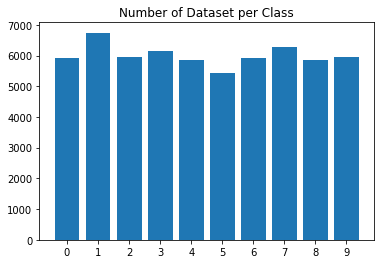

In [19]:
plt.bar(label_nums, nums_dataset)
plt.title('Number of Dataset per Class')
plt.show()

# Pillow로 열기

In [25]:
path

'dataset/mnist_png/training/0\\1.png'

In [26]:
image_pil = Image.open(path)
image = np.array(image_pil)

In [27]:
image.shape

(28, 28)

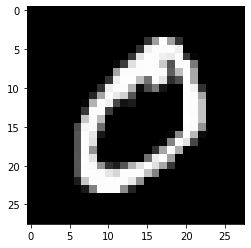

In [29]:
plt.imshow(image, 'gray')
plt.show()

# TensorFlow로 열기

In [30]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [31]:
image.shape

TensorShape([28, 28, 1])

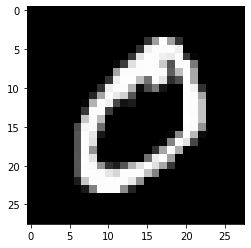

In [33]:
plt.imshow(image[:,:,0], 'gray')
plt.show()

# Label 얻기

In [60]:
path

'dataset/mnist_png/training\\0\\1.png'

In [63]:
label = path.split('\\')[-2]

In [64]:
label

'0'

In [65]:
int(label)

0

In [66]:
def get_label(path):
    class_name = path.split('\\')[-2]
    label = int(class_name)
    return label

In [67]:
path, get_label(path)

('dataset/mnist_png/training\\0\\1.png', 0)

# 데이터 이미지 사이즈 알기

In [68]:
from tqdm import tqdm_notebook

In [69]:
heights = []
widths = []

In [70]:
len(data_paths)

60000

In [73]:
for path in tqdm_notebook(data_paths):
    img_pil = Image.open(path)
    image = np.array(img_pil)
    h, w = image.shape
    
    heights.append(h)
    widths.append(w)

C:\Users\LGCNS\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


In [74]:
np.unique(heights)

array([28])

In [75]:
np.unique(widths)

array([28])

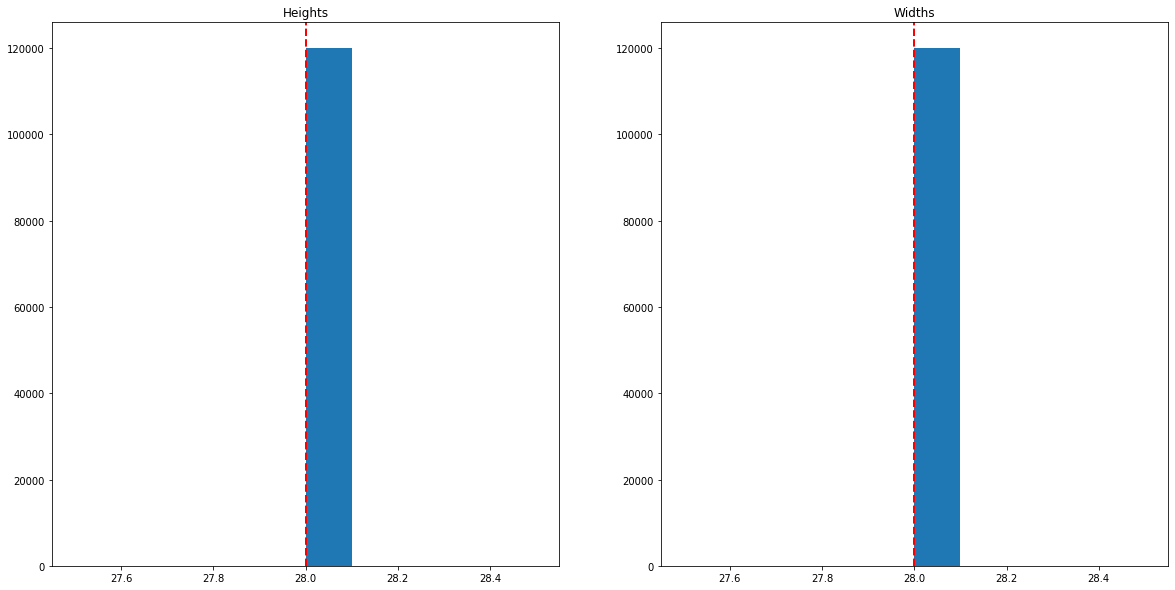

In [78]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.hist(heights)
plt.title('Heights')
plt.axvline(np.mean(heights), color='r', linestyle='dashed', linewidth=2)

plt.subplot(122)
plt.hist(widths)
plt.title('Widths')
plt.axvline(np.mean(widths), color='r', linestyle='dashed', linewidth=2)

plt.show()